In [20]:
from rdflib import Graph
import pandas as pd

rdf_file = "C:/Users/ruthw/Downloads/New folder/data/aifbfixed_complete.n3"
graph = Graph()
graph.parse(rdf_file, format='n3')
print("Number of triples in graph:", len(graph))

Number of triples in graph: 29226


In [21]:
for i, triple in enumerate(graph):
    if i < 10:
        print(triple)

(rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id436instance'), rdflib.term.URIRef('http://swrc.ontoware.org/ontology#isAbout'), rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Forschungsgebiete/viewForschungsgebietOWL/id79instance'))
(rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id361instance'), rdflib.term.URIRef('http://swrc.ontoware.org/ontology#author'), rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id57instance'))
(rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id241instance'), rdflib.term.URIRef('http://swrc.ontoware.org/ontology#author'), rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id20instance'))
(rdflib.term.URIRef('http://www.aifb.uni-karlsruhe.de/Kooperationen/viewOrganizationOWL/id3instance'), rdflib.term.URIRef('http://swrc.ontoware.org/ontology#finances'), rdflib.term.URIRef('http://www.

In [22]:
train_df = pd.read_csv("C:/Users/ruthw/Downloads/New folder/data/trainingSet.tsv", sep='\t', header=None, names=['person', 'id', 'label_affiliation'])
test_df = pd.read_csv("C:/Users/ruthw/Downloads/New folder/data/testSet.tsv", sep='\t', header=None, names=['person', 'id', 'label_affiliation'])
full_df = pd.read_csv("C:/Users/ruthw/Downloads/New folder/data/completeDataset.tsv", sep='\t', header=None, names=['person', 'id', 'label_affiliation'])

In [23]:
full_df.head(10)

,person,id,label_affiliation
0,id,person,label_affiliation
1,1,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
2,2,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
3,3,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
4,4,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
5,5,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
6,6,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
7,7,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
8,8,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...
9,9,http://www.aifb.uni-karlsruhe.de/Personen/view...,http://www.aifb.uni-karlsruhe.de/Forschungsgru...


In [24]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Train label distribution:")
print(train_df['label_affiliation'].value_counts(normalize=True))
print("Test label distribution:")
print(test_df['label_affiliation'].value_counts(normalize=True))

Train shape: (141, 3)
Test shape: (37, 3)
Train label distribution:
label_affiliation
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance    0.411348
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance    0.340426
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance    0.156028
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance    0.085106
label_affiliation                                                                         0.007092
Name: proportion, dtype: float64
Test label distribution:
label_affiliation
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance    0.405405
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance    0.324324
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance    0.162162
http://www.aifb.uni-karlsruhe.de/Forschungsgru

In [25]:
#RDf to entity feature table 
from collections import defaultdict

entity_features = defaultdict(dict)

for s, p, o in graph:
    key = f"{p}={o}"
    entity_features[str(s)][key] = 1

features_df = pd.DataFrame.from_dict(entity_features, orient='index').fillna(0).astype(int)
print("Feature matrix shape:", features_df.shape)

Feature matrix shape: (2829, 10450)


In [26]:
train_df = train_df[train_df['person'].isin(features_df.index)]
test_df = test_df[test_df['person'].isin(features_df.index)]

X_train = features_df.loc[train_df['person']]
X_test = features_df.loc[test_df['person']]

# Align y labels
y_train = train_df.set_index('person').loc[X_train.index]['label_affiliation']
y_test = test_df.set_index('person').loc[X_test.index]['label_affiliation']


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [28]:
# 7. Sanity Checks
# =========================================
print("X_train index matches train_df 'person' index:", all(X_train.index == train_df['person']))
print("X_test index matches test_df 'person' index:", all(X_test.index == test_df['person']))
print("\nUnseen labels in test set:", set(y_test) - set(y_train))

X_train index matches train_df 'person' index: True
X_test index matches test_df 'person' index: True

Unseen labels in test set: set()


In [29]:
# Print shapes
print("X_train shape:", X_train.shape, ", y_train length:", len(y_train_enc))
print("X_test shape:", X_test.shape, ", y_test length:", len(y_test_enc))

X_train shape: (140, 10450) , y_train length: 140
X_test shape: (36, 10450) , y_test length: 36


In [30]:
 #8. Check for Feature Leakage (correlation)
# =========================================
correlations = X_train.corrwith(pd.Series(y_train_enc, index=X_train.index)).abs()
leak_features = correlations[correlations > 0.5].sort_values(ascending=False)
print("Top correlated features with label:")
print(leak_features.head(10))

Top correlated features with label:
http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance    0.886108
http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance    0.622667
http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance    0.557219
dtype: float64


In [31]:
leaky_cols = [col for col in correlations.index if 'affiliation=' in col and any(lbl in col for lbl in y_train.unique())]
X_train_filtered = X_train.drop(columns=leaky_cols)
X_test_filtered = X_test.drop(columns=leaky_cols)

print(f"Features leaking label info: {leaky_cols}")
print(f"Original feature count: {X_train.shape[1]}, after removal: {X_train_filtered.shape[1]}")

Features leaking label info: ['http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance', 'http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance', 'http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance', 'http://swrc.ontoware.org/ontology#affiliation=http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance']
Original feature count: 10450, after removal: 10446


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_filtered, y_train_enc)
y_pred = clf.predict(X_test_filtered)

In [33]:
# 10. Evaluate Model
# =========================================
acc = accuracy_score(y_test_enc, y_pred)
print(f"Test Accuracy (filtered features): {acc:.4f}\n")
print("Classification Report (filtered features):")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_, zero_division=0))


Test Accuracy (filtered features): 0.6944

Classification Report (filtered features):
                                                                                        precision    recall  f1-score   support

http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance       0.58      1.00      0.73        15
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance       0.00      0.00      0.00         6
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance       1.00      0.75      0.86        12
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance       1.00      0.33      0.50         3

                                                                              accuracy                           0.69        36
                                                                             macro avg       0.64      0.52      0.52        36
                

In [34]:
!pip install shap


 99%|===================| 552/560 [00:17<00:00]        

Single-output shap_values.shape = (140, 10446, 4)
sv.shape: (140, 10446, 4)
X_sample.shape: (140, 10446)


C:\Users\ruthw\AppData\Local\Temp\ipykernel_18976\2507369623.py:32: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv, X_sample, max_display=30)
C:\Users\ruthw\anaconda3\lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\ruthw\anaconda3\lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


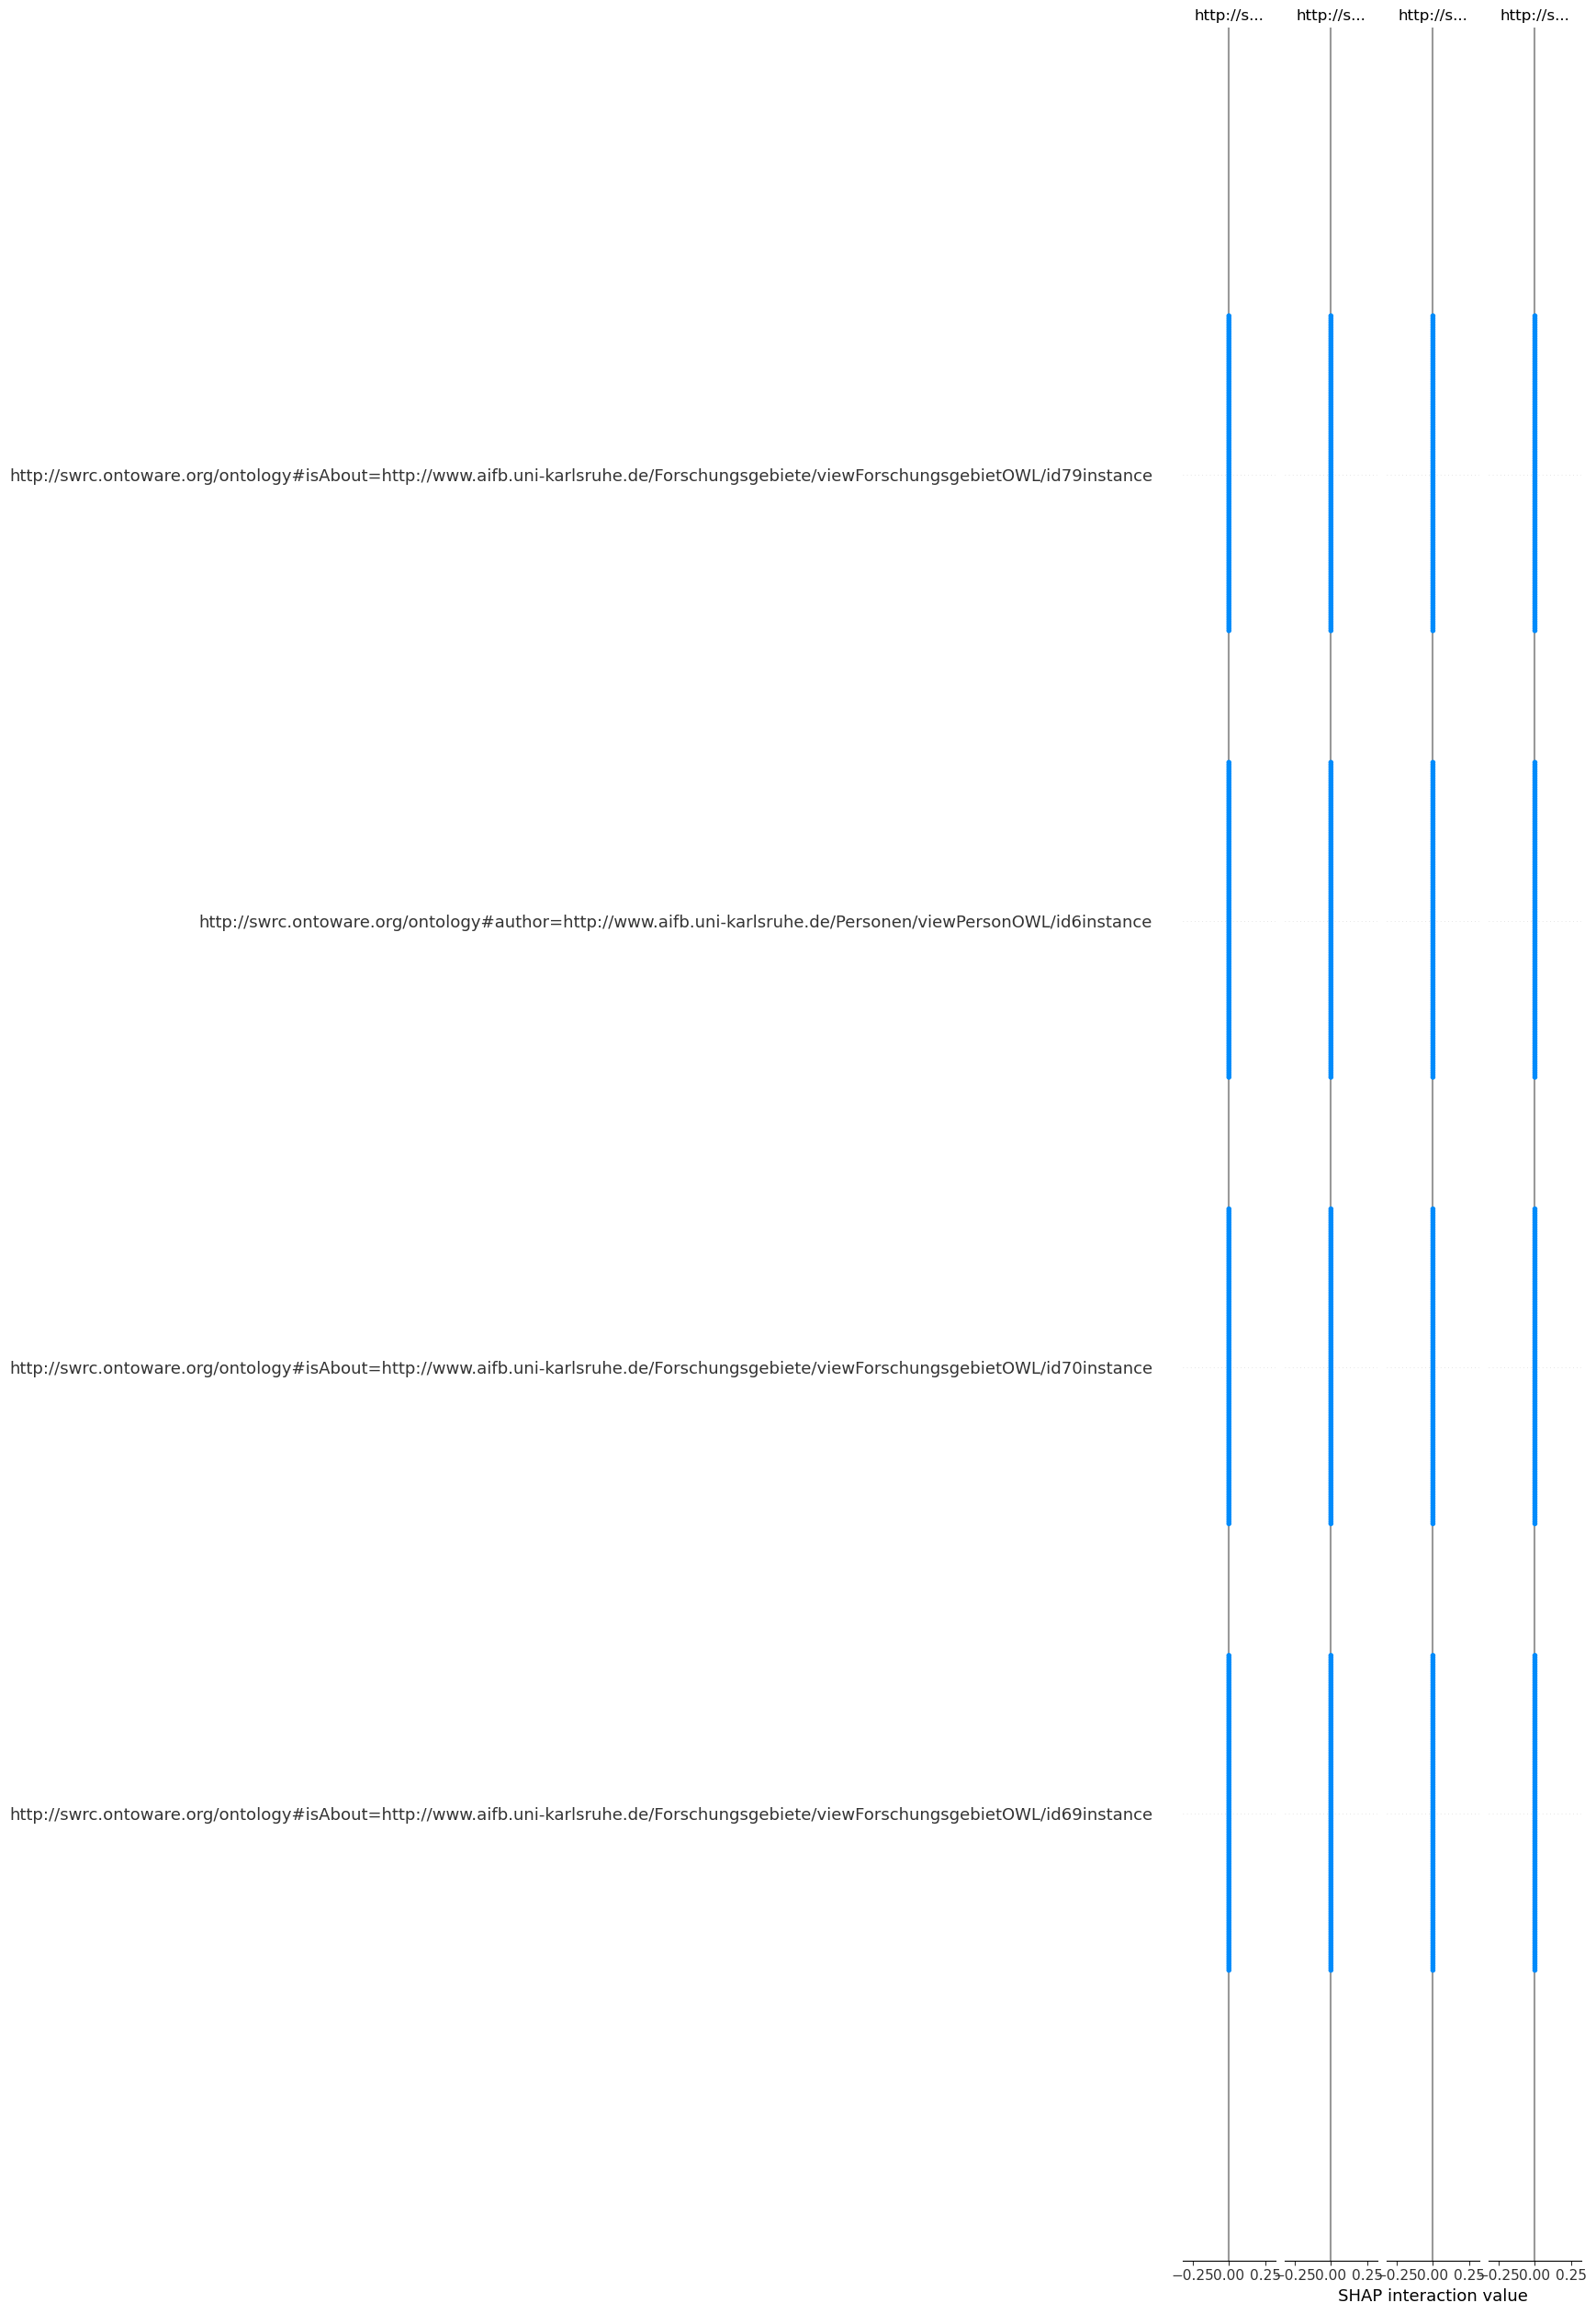

In [43]:
# After creating explainer and X_sample:
shap_values = explainer.shap_values(X_sample, check_additivity=False)

# Examine shap_values:
if isinstance(shap_values, list):
    for i, arr in enumerate(shap_values):
        print(f"shap_values[{i}].shape =", arr.shape)
    # Choose one class to plot:
    class_idx = 1
    sv = shap_values[class_idx]
else:
    sv = shap_values
    print("Single-output shap_values.shape =", sv.shape)

print("sv.shape:", sv.shape)
print("X_sample.shape:", X_sample.shape)

# Check column alignment if shapes mismatch:
if sv.shape[1] != X_sample.shape[1]:
    print("Column count mismatch!")
    print("Training columns count:", len(X_train_filtered.columns))
    print("X_sample columns count:", len(X_sample.columns))
    # Check ordering:
    same = list(X_train_filtered.columns) == list(X_sample.columns)
    print("Columns identical & same order as training?", same)
    # Maybe reindex:
    X_sample_fixed = X_sample.reindex(columns=X_train_filtered.columns)
    print("After reindex, X_sample_fixed.shape:", X_sample_fixed.shape)
    # After fixing, recompute shap_values or re-slice.
else:
    # Now safe to plot
    shap.summary_plot(sv, X_sample, max_display=30)


In [44]:
import numpy as np

sv = shap_values  # your 3D array, shape (140, 10446, 4)
print("shap_values ndim:", sv.ndim)
print("shap_values.shape:", sv.shape)
n_samples, n_features, n_classes = sv.shape
print("Samples:", n_samples, "Features:", n_features, "Classes:", n_classes)
print("Number of label classes:", len(le.classes_))


shap_values ndim: 3
shap_values.shape: (140, 10446, 4)
Samples: 140 Features: 10446 Classes: 4
Number of label classes: 4


In [40]:
explainer = shap.TreeExplainer(clf, data=X_train_filtered, model_output="probability", feature_perturbation="interventional")
shap_values = explainer.shap_values(X_sample, check_additivity=False)


100%|===================| 559/560 [00:20<00:00]        

 93%|=================== | 520/560 [00:12<00:00]       

Computed SHAP values: shape = (140, 10446, 4)
Using class index 0 (http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance) for summary plots.
Top 20 features for class http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance:
                                              feature  mean_abs_shap
0   http://www.w3.org/1999/02/22-rdf-syntax-ns#typ...       0.037557
1     http://swrc.ontoware.org/ontology#homepage=None       0.024419
2            http://swrc.ontoware.org/ontology#phone=       0.021469
3              http://swrc.ontoware.org/ontology#fax=       0.018910
4   http://swrc.ontoware.org/ontology#fax=+49 (721...       0.015277
5           http://swrc.ontoware.org/ontology#phone=-       0.010693
6   http://swrc.ontoware.org/ontology#fax=+49 (721...       0.010671
7   http://swrc.ontoware.org/ontology#publication=...       0.007882
8   http://swrc.ontoware.org/ontology#fax=+49 (721...       0.007230
9   http://swrc.ontowa

C:\Users\ruthw\AppData\Local\Temp\ipykernel_18976\3155729909.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


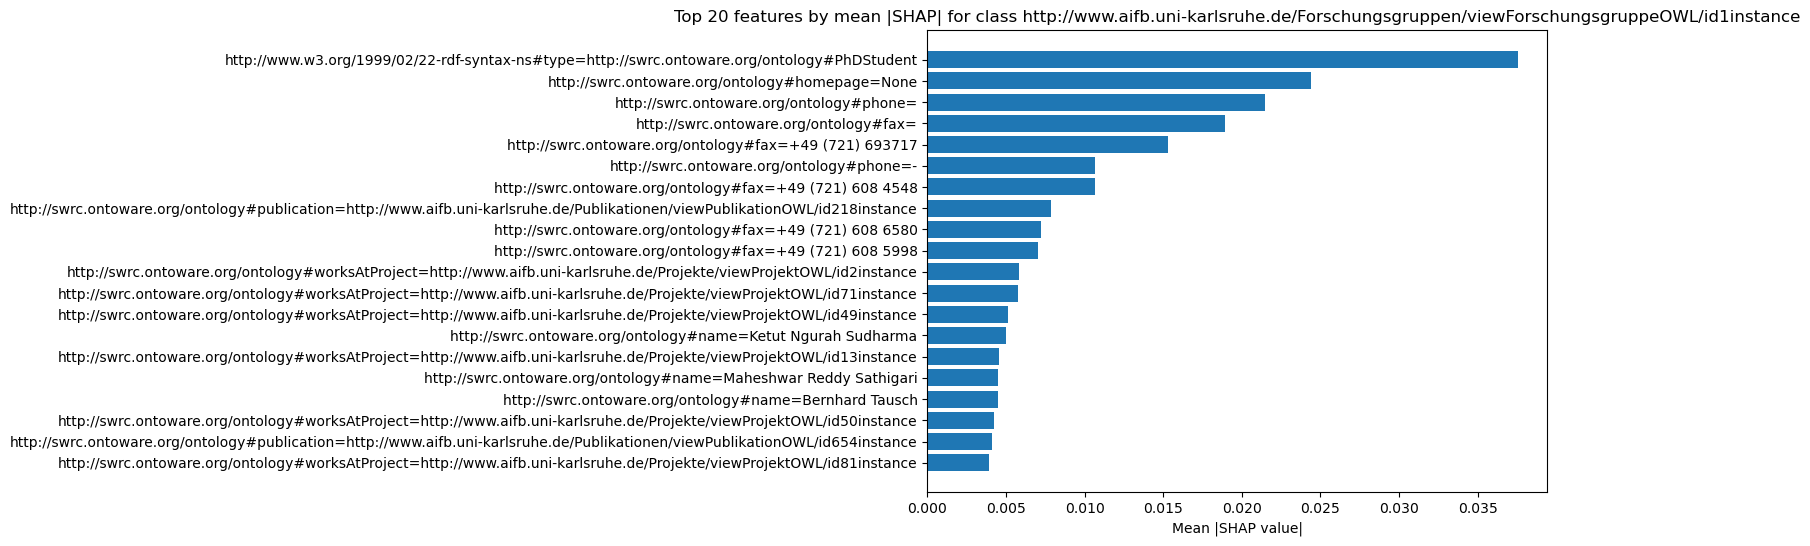

Dependence plot for feature 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type=http://swrc.ontoware.org/ontology#PhDStudent' (class http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance):


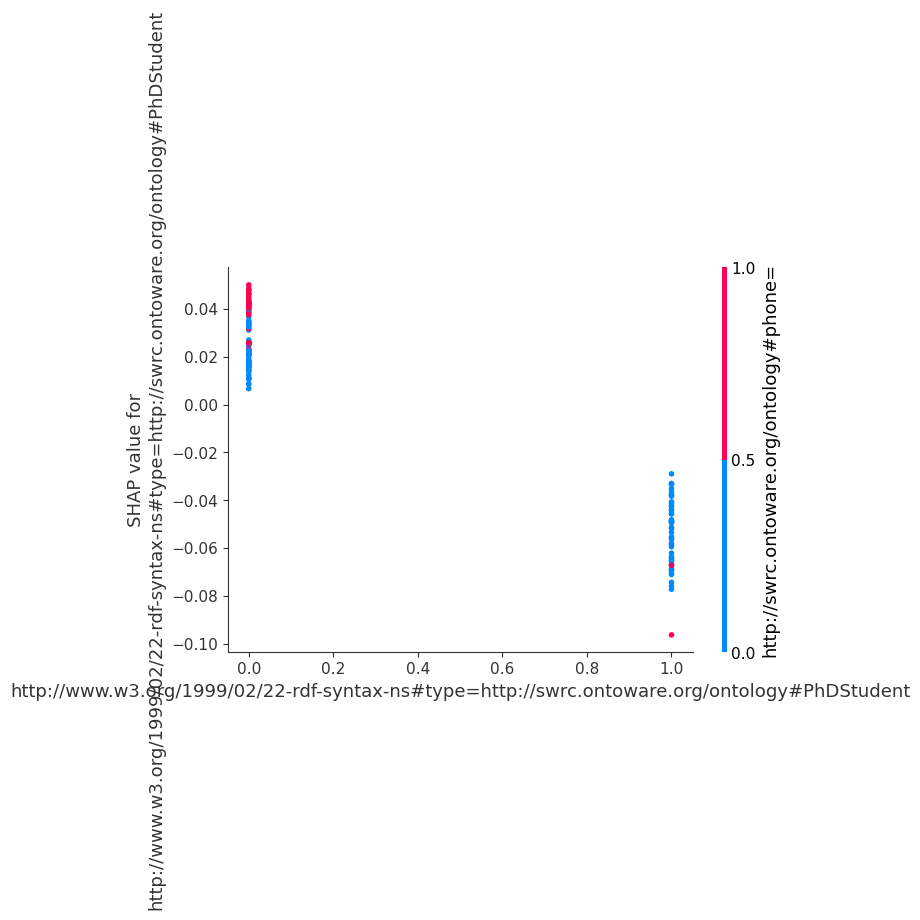

Dependence plot for feature 'http://swrc.ontoware.org/ontology#homepage=None' (class http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance):


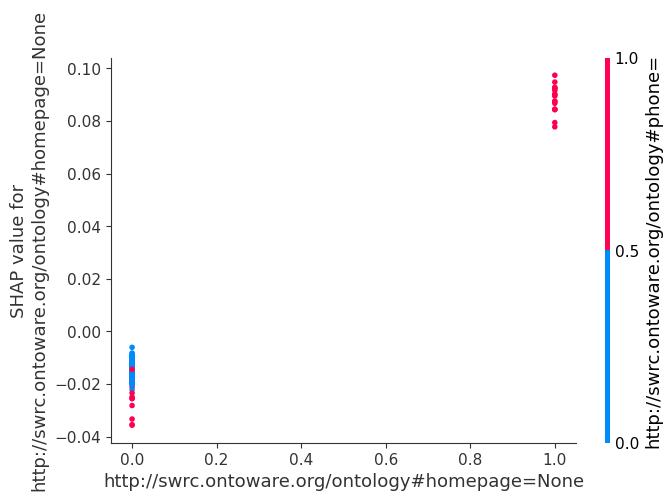

Dependence plot for feature 'http://swrc.ontoware.org/ontology#phone=' (class http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance):


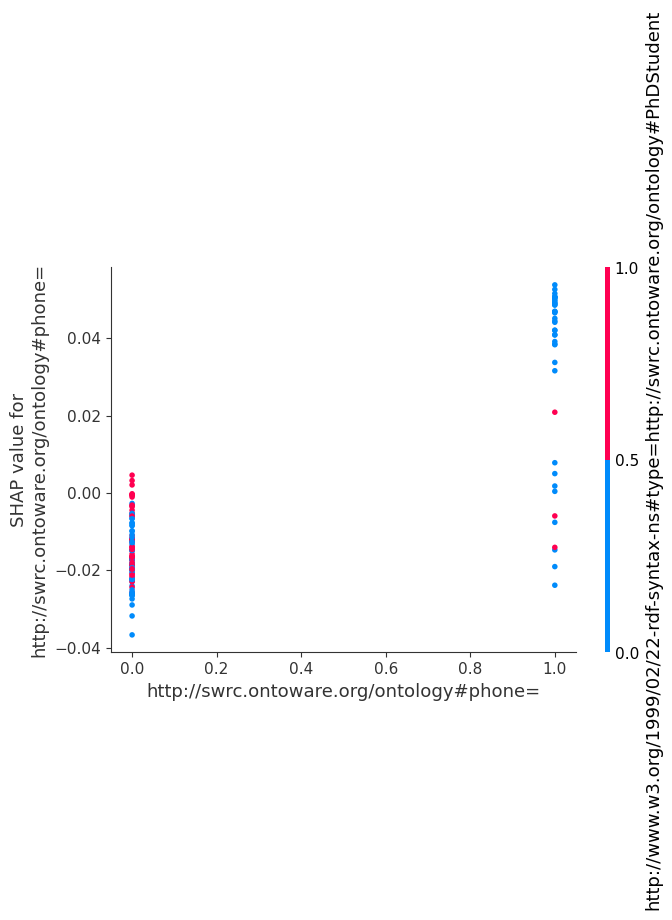


Force plot for sample index 0 (class http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance):



Force plot for sample index 1 (class http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance):


C:\Users\ruthw\AppData\Local\Temp\ipykernel_18976\3155729909.py:127: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv_sub, X_sub, max_display=top_k, plot_type="bar", show=True)
C:\Users\ruthw\anaconda3\lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


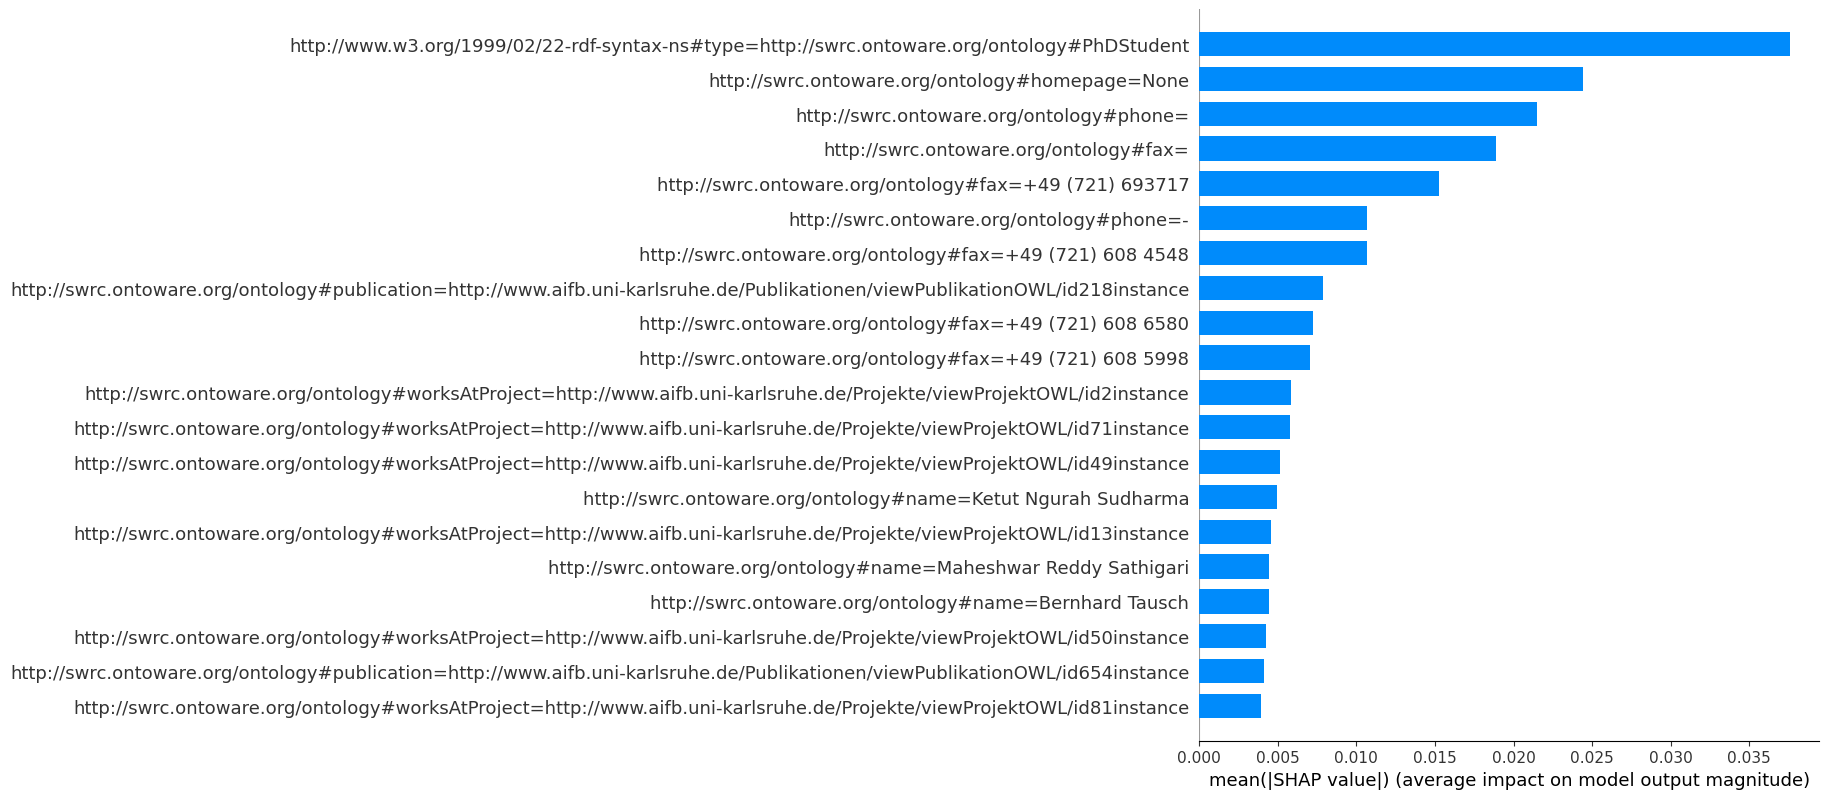

In [46]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Subsample rows to limit computation (optional)
def get_shap_sample(df, max_rows=200, random_state=42):
    if len(df) > max_rows:
        return df.sample(n=max_rows, random_state=random_state)
    else:
        return df

# Choose a sample from training (or test) set:
X_sample = get_shap_sample(X_train_filtered, max_rows=200, random_state=42)

# Ensure columns/order match training DataFrame used for clf:
assert list(X_sample.columns) == list(X_train_filtered.columns), \
    "Column mismatch: X_sample columns must match X_train_filtered columns exactly."

# 2. Build TreeExplainer once (as before).
explainer = shap.TreeExplainer(
    clf,
    data=X_train_filtered,                 # reference data
    model_output="probability",            # explain probabilities
    feature_perturbation="interventional"  # robust mode
)

# 3. Compute SHAP values for X_sample
#    This returns either a list of arrays [n_samples x n_features] per class,
#    or a 3D array (n_samples, n_features, n_classes).
shap_values_all = explainer.shap_values(X_sample, check_additivity=False)
if isinstance(shap_values_all, list):
    # stack into shape (n_samples, n_features, n_classes)
    shap_values_np = np.stack(shap_values_all, axis=-1)
else:
    shap_values_np = shap_values_all

n_samples, n_features, n_classes = shap_values_np.shape
print(f"Computed SHAP values: shape = {shap_values_np.shape}")
assert n_samples == X_sample.shape[0]
assert n_features == X_sample.shape[1]
assert n_classes == len(le.classes_)

# 4. Choose a class of interest for plotting (e.g. class_idx = 0, 1, …)
#    If you have domain knowledge, pick the class whose explanations matter most.
#    Otherwise you might inspect each class’s global importance but plot only one.
class_idx_of_interest = 0  # e.g. change to the index you care about
class_name = le.classes_[class_idx_of_interest]
print(f"Using class index {class_idx_of_interest} ({class_name}) for summary plots.")

# 5. Slice 2D SHAP for that class: shape (n_samples, n_features)
sv_class = shap_values_np[:, :, class_idx_of_interest]
assert sv_class.shape == (n_samples, n_features)

# 6. Compute global importance: mean absolute SHAP per feature
mean_abs_shap = np.abs(sv_class).mean(axis=0)  # shape (n_features,)
# Create a DataFrame for top features
feat_names = X_sample.columns.tolist()
df_imp = pd.DataFrame({
    'feature': feat_names,
    'mean_abs_shap': mean_abs_shap
})
df_imp = df_imp.sort_values('mean_abs_shap', ascending=False).reset_index(drop=True)

# 7. Display top-k features in a table (no graphs)
top_k = 20
top_df = df_imp.head(top_k)
print(f"Top {top_k} features for class {class_name}:")
print(top_df)

# If you are in a Jupyter environment, you could display it nicely:
# import display from IPython.display if needed, but a print is fine.

# 8. Bar plot of global importance (only one plot)
plt.figure(figsize=(8, 6))
plt.barh(
    y=list(reversed(top_df['feature'])),
    width=list(reversed(top_df['mean_abs_shap']))
)
plt.xlabel("Mean |SHAP value|")
plt.title(f"Top {top_k} features by mean |SHAP| for class {class_name}")
plt.tight_layout()
plt.show()

# 9. (Optional) Dependence plot for a very small number of chosen features:
#    For example, pick the top 3 features only.
chosen_features = top_df['feature'].tolist()[:3]
for feat in chosen_features:
    print(f"Dependence plot for feature '{feat}' (class {class_name}):")
    shap.dependence_plot(feat, sv_class, X_sample, show=True)

# 10. (Optional) Force/waterfall for a few samples:
#    E.g., explain first 2 samples in X_sample for the chosen class.
num_to_explain = 2
ev = explainer.expected_value
# expected_value may be array-like of length n_classes
if isinstance(ev, (list, np.ndarray)):
    base_value = ev[class_idx_of_interest]
else:
    base_value = ev

for i in range(min(num_to_explain, n_samples)):
    print(f"\nForce plot for sample index {i} (class {class_name}):")
    row = X_sample.iloc[i:i+1]
    shap.initjs()
    # JS-based force plot in Jupyter:
    shap.force_plot(base_value, sv_class[i], row, matplotlib=False)
    # Static waterfall if desired:
    try:
        shap.plots._waterfall.waterfall_legacy(
            shap.Explanation(values=sv_class[i],
                             base_values=base_value,
                             data=row.iloc[0]),
            show=True
        )
    except Exception:
        pass

# 11. (Optional) If you prefer to focus on top features only in summary_plot:
#     You can slice both X_sample and sv_class to only the top_k features:
top_features = top_df['feature'].tolist()  # already top_k
X_sub = X_sample[top_features]
# Extract corresponding columns from sv_class:
top_indices = [X_sample.columns.get_loc(f) for f in top_features]
sv_sub = sv_class[:, top_indices]  # shape (n_samples, top_k)
# Now a smaller summary plot:
shap.summary_plot(sv_sub, X_sub, max_display=top_k, plot_type="bar", show=True)

# End of streamlined SHAP explanation code.
